In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK/NFRP_random_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.374,0.0582,[2],0,0.330,73,0.0892,...,-1,0,0,(),Normal,Unk,Unk,1,Target,179616080
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,RYPAHLAR/3,0.157,0.0130,[2],0,0.334,25,0.0690,...,-1,0,0,(),Normal,Unk,Unk,1,Target,238770312
2,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,SDLHEVK/2,0.133,0.0000,[2],0,0.497,15,0.0500,...,-1,0,0,(),Normal,Unk,Unk,1,Target,241538142
3,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,IEGLDIHFIHVK/4,0.092,0.0230,[2],0,0.240,4,0.0690,...,-1,0,0,(),Normal,Unk,Unk,1,Target,119361159
4,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.479,0.1580,[2],0,-0.002,89,0.0820,...,-1,0,0,(),Normal,Unk,Unk,1,Target,236712749


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK/NFRP_random_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,VFNVHC[160]EGR/2,0.292,0.104,[2],0,0.001,50,0.066,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,399861254
1,b1906_293T_proteinID_01A_QE3_122212.01926.01926.4,1,PMQHHGAVPGPRGR/4,0.184,0.078,[2],0,0.002,9,0.060,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,411155929
2,b1906_293T_proteinID_01A_QE3_122212.01934.01934.3,1,KHSEEHSE/3,0.131,0.053,[2],0,0.327,4,0.060,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,544877278
3,b1906_293T_proteinID_01A_QE3_122212.01943.01943.2,1,YYPSGSLVK/2,0.232,0.085,[2],0,-0.005,58,0.056,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,589681879
4,b1906_293T_proteinID_01A_QE3_122212.01951.01951.4,1,ILLVSHFYDWMKK/4,0.242,0.002,[2],0,0.243,18,0.102,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,452131683


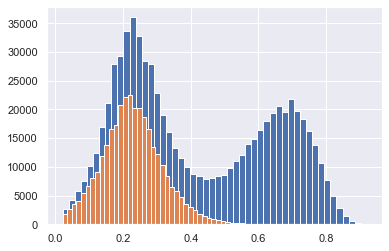

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.018000000000000006
0.013739999999999999


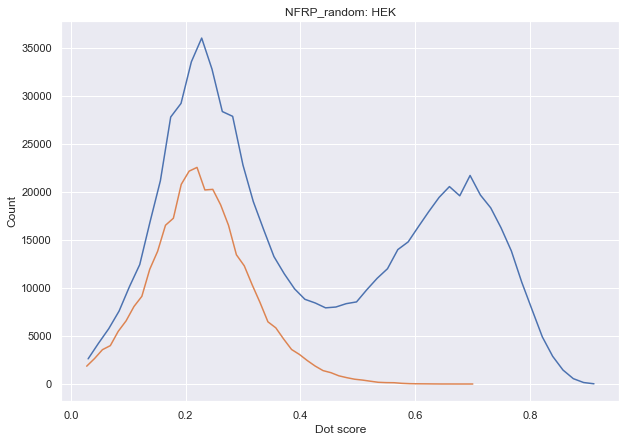

In [8]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('NFRP_random: HEK')
plt.plot(nnt1[1][:-1] + 0.009, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0065, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

713200
320686


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.46700000000000036
nnt:  292640
nnd:  2900
FDR:  0.00990978676872608
"""

score:  0.001
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.002
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.003
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.004
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.005
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.006
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.007
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.008
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.009000000000000001
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.010000000000000002
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.011000000000000003
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.012000000000000004
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.013000000000000005
nnt:  713200
nnd:  320686
FDR:  0.44964385866517104


score:  0.014000000000000005
nnt:  713200

nnt:  687652
nnd:  296528
FDR:  0.43121811614014066


score:  0.10400000000000008
nnt:  687104
nnd:  295991
FDR:  0.4307804932004471


score:  0.10500000000000008
nnt:  686513
nnd:  295437
FDR:  0.4303443634716313


score:  0.10600000000000008
nnt:  685935
nnd:  294907
FDR:  0.4299343232230459


score:  0.10700000000000008
nnt:  685330
nnd:  294374
FDR:  0.42953613587614725


score:  0.10800000000000008
nnt:  684725
nnd:  293795
FDR:  0.42907006462448427


score:  0.10900000000000008
nnt:  684101
nnd:  293200
FDR:  0.42859168456119784


score:  0.11000000000000008
nnt:  683507
nnd:  292648
FDR:  0.4281565514325384


score:  0.11100000000000008
nnt:  682838
nnd:  292081
FDR:  0.42774567320506474


score:  0.11200000000000009
nnt:  682245
nnd:  291511
FDR:  0.42728198814208973


score:  0.11300000000000009
nnt:  681627
nnd:  290905
FDR:  0.4267803358728454


score:  0.11400000000000009
nnt:  680973
nnd:  290262
FDR:  0.4262459745100026


score:  0.11500000000000009
nnt:  680324
nnd:  289

nnt:  566066
nnd:  189670
FDR:  0.3350669356576795


score:  0.20600000000000016
nnt:  564251
nnd:  188042
FDR:  0.33325948912806536


score:  0.20700000000000016
nnt:  562387
nnd:  186341
FDR:  0.3313394513031062


score:  0.20800000000000016
nnt:  560541
nnd:  184774
FDR:  0.32963512035694087


score:  0.20900000000000016
nnt:  558639
nnd:  183144
FDR:  0.32783962451601123


score:  0.21000000000000016
nnt:  556776
nnd:  181628
FDR:  0.3262137735821946


score:  0.21100000000000016
nnt:  554901
nnd:  180008
FDR:  0.3243966040789258


score:  0.21200000000000016
nnt:  553004
nnd:  178376
FDR:  0.32255824550997825


score:  0.21300000000000016
nnt:  551131
nnd:  176770
FDR:  0.32074044102037447


score:  0.21400000000000016
nnt:  549305
nnd:  175137
FDR:  0.31883379907337456


score:  0.21500000000000016
nnt:  547385
nnd:  173480
FDR:  0.3169250162134512


score:  0.21600000000000016
nnt:  545566
nnd:  171809
FDR:  0.3149188182548033


score:  0.21700000000000016
nnt:  543693
nnd:  170

nnt:  396178
nnd:  54336
FDR:  0.13715047276729148


score:  0.3080000000000002
nnt:  394980
nnd:  53546
FDR:  0.13556635779026785


score:  0.3090000000000002
nnt:  393800
nnd:  52749
FDR:  0.13394870492635855


score:  0.3100000000000002
nnt:  392701
nnd:  51976
FDR:  0.13235515061077002


score:  0.3110000000000002
nnt:  391509
nnd:  51168
FDR:  0.1306943135406849


score:  0.3120000000000002
nnt:  390414
nnd:  50371
FDR:  0.1290194511467314


score:  0.3130000000000002
nnt:  389243
nnd:  49625
FDR:  0.12749105314674894


score:  0.3140000000000002
nnt:  388107
nnd:  48877
FDR:  0.1259369194577784


score:  0.3150000000000002
nnt:  387024
nnd:  48121
FDR:  0.12433595849353012


score:  0.3160000000000002
nnt:  385984
nnd:  47400
FDR:  0.12280301774166805


score:  0.3170000000000002
nnt:  384927
nnd:  46661
FDR:  0.12122038724225632


score:  0.3180000000000002
nnt:  383915
nnd:  45944
FDR:  0.11967232330073063


score:  0.31900000000000023
nnt:  382868
nnd:  45201
FDR:  0.118058965

nnt:  319000
nnd:  9492
FDR:  0.02975548589341693


score:  0.4100000000000003
nnt:  318491
nnd:  9313
FDR:  0.029241014659754906


score:  0.4110000000000003
nnt:  317998
nnd:  9131
FDR:  0.028714017069289745


score:  0.4120000000000003
nnt:  317525
nnd:  8942
FDR:  0.02816156208172585


score:  0.4130000000000003
nnt:  317041
nnd:  8765
FDR:  0.02764626657120057


score:  0.4140000000000003
nnt:  316542
nnd:  8607
FDR:  0.027190704551054837


score:  0.4150000000000003
nnt:  316087
nnd:  8449
FDR:  0.02672998256809043


score:  0.4160000000000003
nnt:  315637
nnd:  8279
FDR:  0.026229497809192204


score:  0.4170000000000003
nnt:  315207
nnd:  8121
FDR:  0.02576402173809592


score:  0.4180000000000003
nnt:  314740
nnd:  7961
FDR:  0.0252938933723073


score:  0.4190000000000003
nnt:  314231
nnd:  7805
FDR:  0.024838415051347575


score:  0.4200000000000003
nnt:  313755
nnd:  7653
FDR:  0.024391643161065162


score:  0.4210000000000003
nnt:  313275
nnd:  7511
FDR:  0.023975740164392

'\n결과\n'